# Dataset Simulation Test 

### Based off of Literature review and research into distributions for pet dogs in Southern US

#### Note:
- Dog-specific features use national distributions
- Environ features use Southeast US distributions

In [59]:
import numpy as np
import pandas as pd
import ast 

In [60]:
import os
os.getcwd()
# change directory to where you cloned Repo on your local machine
# you can then access our files there rather than needing to download each onto local machine
os.chdir("/Users/ellawileman/Documents/fall2025/VIPR/CoolDawgs_PersonalizationGrp")

In [61]:
dogs_dataset = pd.read_csv("dogs_dataset.csv")
dogs_dataset.head()

# use for sampling breed.
# for each breed. this dataset is simulated but menat to represent real-world
# distributions

,Breed,Age (Years),Weight (kg),Color,Gender
0,Airedale Terrier,13,35,White,Male
1,Jack Russell Terrier,10,43,Tan,Female
2,Dogo Argentino,2,16,Spotted,Female
3,Labrador Retriever,9,57,Bicolor,Male
4,French Bulldog,12,39,Spotted,Male


In [62]:
# get distribution for breeds (popularity in US = proportions)
breed_probs = dogs_dataset["Breed"].value_counts(normalize=True)

# View as percentages
breed_percentages = (breed_probs * 100).round(2)
# Print
print(breed_percentages.head())  # top 5 breeds

breed_categories = breed_probs.index.tolist()
breed_probabilities = breed_probs.values.tolist()

Breed
Rottweiler              3.93
French Bulldog          2.33
Pekingese               2.27
Pembroke Welsh Corgi    2.23
Doberman Pinscher       2.20
Name: proportion, dtype: float64


In [63]:
# summarize each breed's age, wt, gender, color distributions.
breed_params_df = dogs_dataset.groupby('Breed').agg({
    'Age (Years)': ['mean', 'std'],
    'Weight (kg)': ['mean', 'std'],
    'Gender': lambda x: x.value_counts(normalize=True).to_dict(),
    'Color': lambda x: x.value_counts(normalize=True).to_dict()
}).reset_index()

# need mu and sd to use normal distribution for each breed's age and wt to build sample population.
breed_params_df.columns = ['Breed', 'age_mu', 'age_sd', 'wt_mu', 'wt_sd', 'gender_probs', 'color_probs']
breed_params_df.head()

,Breed,age_mu,age_sd,wt_mu,wt_sd,gender_probs,color_probs
0,Airedale Terrier,8.218182,4.336285,31.818182,13.997475,"{'Male': 0.5454545454545454, 'Female': 0.45454...","{'Tricolor': 0.12727272727272726, 'Bicolor': 0..."
1,Akita,7.784314,3.874603,31.686275,14.360348,"{'Male': 0.5686274509803921, 'Female': 0.43137...","{'Merle': 0.11764705882352941, 'Black and Whit..."
2,Alaskan Malamute,6.981818,3.870548,34.636364,14.876484,"{'Male': 0.5454545454545454, 'Female': 0.45454...","{'Blue': 0.10909090909090909, 'Merle': 0.10909..."
3,Australian Shepherd,7.823529,3.675355,33.352941,16.359491,"{'Male': 0.5882352941176471, 'Female': 0.41176...","{'Brown': 0.11764705882352941, 'Sable': 0.0980..."
4,Basenji,7.551020,4.178622,31.938776,17.336628,"{'Male': 0.5102040816326531, 'Female': 0.48979...","{'Cream': 0.12244897959183673, 'Brindle': 0.12..."


#### ***TODO***: get breed specific max and mins. so we can ensure sampled values are within reasonable range. 
- trim off the S at end of each breed (plural) from breed traits dataset and convert Retrievers (Golden) to Golden Retriever, etc to match with our sampled breed names in synthetic dataset

In [64]:
breed_schema = {
    "Breed": {
        "type": "categorical",
        "categories": breed_categories,
        "probs": breed_probabilities
    }
}
len(breed_schema["Breed"]["categories"])
# only 53 breeds here
sum(breed_schema["Breed"]["probs"])
display(breed_schema["Breed"]["categories"])

['Rottweiler',
 'French Bulldog',
 'Pekingese',
 'Pembroke Welsh Corgi',
 'Doberman Pinscher',
 'Weimaraner',
 'Pug',
 'Bichon Frise',
 'Vizsla',
 'Cavalier King Charles Spaniel',
 'Chinese Shar-Pei',
 'Poodle',
 'Whippet',
 'Dachshund',
 'Cocker Spaniel',
 'Bloodhound',
 'Border Collie',
 'Lhasa Apso',
 'Samoyed',
 'Bernese Mountain Dog',
 'Alaskan Malamute',
 'Miniature Schnauzer',
 'Jack Russell Terrier',
 'Bulldog',
 'Airedale Terrier',
 'Dogo Argentino',
 'Irish Setter',
 'Bull Terrier',
 'Havanese',
 'Beagle',
 'Great Dane',
 'Saint Bernard',
 'Boston Terrier',
 'German Shepherd',
 'Siberian Husky',
 'Yorkshire Terrier',
 'Labrador Retriever',
 'Boxer',
 'Chesapeake Bay Retriever',
 'Maltese',
 'Shih Tzu',
 'Australian Shepherd',
 'Akita',
 'Shetland Sheepdog',
 'Basenji',
 'Papillon',
 'West Highland White Terrier',
 'Chihuahua',
 'Pomeranian',
 'Schnauzer',
 'Shiba Inu',
 'Belgian Malinois',
 'Golden Retriever']

### Using sample dog pop (aggregate by breed to find params) from Kaggle

In [65]:
N = 1000 # can change sample size later
sampled_breeds = np.random.choice(
        breed_schema["Breed"]["categories"],
        size=N,
        p=breed_schema["Breed"]["probs"]
    )
#display(breeds)

synthetic_rows = []

for breed in sampled_breeds:
    # lookup parameters for that breed
    params = breed_params_df.loc[breed_params_df["Breed"] == breed].iloc[0]

    # sample continuous features
    age = np.random.normal(params["age_mu"], params["age_sd"])
    weight = np.random.normal(params["wt_mu"], params["wt_sd"])

    # handle categorical features
    gender_probs = params["gender_probs"]
    if isinstance(gender_probs, str):
        gender_probs = ast.literal_eval(gender_probs)
    gender = np.random.choice(list(gender_probs.keys()), p=list(gender_probs.values()))

    color_probs = params["color_probs"]
    if isinstance(color_probs, str):
        color_probs = ast.literal_eval(color_probs)
    color = np.random.choice(list(color_probs.keys()), p=list(color_probs.values()))

    synthetic_rows.append({
        "Breed": breed,
        "Age": round(age, 1),
        "Weight": round(weight, 1),
        "Gender": gender,
        "Color": color
    })
synthetic_dogs_df = pd.DataFrame(synthetic_rows)
display(synthetic_dogs_df.head(30))

,Breed,Age,Weight,Gender,Color
0,Golden Retriever,1.7,49.0,Female,Black and White
1,Chihuahua,4.8,31.5,Male,Black
2,Weimaraner,7.4,39.6,Female,Sable
3,Great Dane,15.2,24.4,Male,Red
4,Bichon Frise,9.7,47.8,Male,Red
5,Akita,8.3,4.8,Male,Sable
6,Labrador Retriever,5.1,36.7,Male,Bicolor
7,Rottweiler,7.9,69.1,Female,Blue
8,Dachshund,12.0,60.1,Male,Black and White
9,Dogo Argentino,4.8,-3.2,Female,Blue


### Now map to coat length, coat type, and playfulness/energy level*

*From other Kaggle dataset(s) - breed_traits.csv

In [66]:
breed_traits = pd.read_csv("breed_traits.csv")
breed_traits.columns
#display(breed_traits)
trait_desc = pd.read_csv("trait_description.csv")
display(trait_desc)

# explains scale of each trait (scale of 1-5 and what 1 and 5 represent)
# for each dog, have their score in each of these columns. (195 breeds)
# Let's use for Coat Length, Coat Type, Energy Level, Playfulness Level

,Trait,Trait_1,Trait_5,Description
0,Affectionate With Family,Independent,Lovey-Dovey,How affectionate a breed is likely to be with ...
1,Good With Young Children,Not Recommended,Good With Children,A breed's level of tolerance and patience with...
2,Good With Other Dogs,Not Recommended,Good With Other Dogs,How generally friendly a breed is towards othe...
3,Shedding Level,No Shedding,Hair Everywhere,How much fur and hair you can expect the breed...
4,Coat Grooming Frequency,Monthly,Daily,"How frequently a breed requires bathing, brush..."
5,Drooling Level,Less Likely to Drool,Always Have a Towel,How drool-prone a breed tends to be. If you're...
6,Coat Type,-,-,"Canine coats come in many different types, dep..."
7,Coat Length,-,-,How long the breed's coat is expected to be. S...
8,Openness To Strangers,Reserved,Everyone Is My Best Friend,How welcoming a breed is likely to be towards ...
9,Playfulness Level,Only When You Want To Play,Non-Stop,How enthusiastic about play a breed is likely ...


In [67]:
breed_traits["Coat Length"].value_counts()


Coat Length
Short           86
Medium          79
Long            29
Plott Hounds     1
Name: count, dtype: int64

In [68]:
breed_traits["Coat Type"].value_counts()

Coat Type
Double          66
Smooth          66
Wiry            30
Silky            9
Curly            7
Wavy             6
Corded           4
Hairless         3
Rough            3
Plott Hounds     1
Name: count, dtype: int64

In [69]:
sorted_breeds = sorted(breed_traits["Breed"].unique())
pd.set_option("display.max_rows", None)  # show all
display(sorted_breeds)


['Affenpinschers',
 'Afghan\xa0Hounds',
 'Airedale\xa0Terriers',
 'Akitas',
 'Alaskan\xa0Malamutes',
 'American\xa0English\xa0Coonhounds',
 'American\xa0Eskimo\xa0Dogs',
 'American\xa0Foxhounds',
 'American\xa0Hairless\xa0Terriers',
 'American\xa0Staffordshire\xa0Terriers',
 'Anatolian\xa0Shepherd\xa0Dogs',
 'Australian\xa0Cattle\xa0Dogs',
 'Australian\xa0Shepherds',
 'Australian\xa0Terriers',
 'Azawakhs',
 'Barbets',
 'Basenjis',
 'Basset\xa0Hounds',
 'Beagles',
 'Bearded\xa0Collies',
 'Beaucerons',
 'Bedlington\xa0Terriers',
 'Belgian\xa0Malinois',
 'Belgian\xa0Sheepdogs',
 'Belgian\xa0Tervuren',
 'Bergamasco\xa0Sheepdogs',
 'Berger\xa0Picards',
 'Bernese\xa0Mountain\xa0Dogs',
 'Bichons\xa0Frises',
 'Black\xa0Russian\xa0Terriers',
 'Black\xa0and\xa0Tan\xa0Coonhounds',
 'Bloodhounds',
 'Bluetick\xa0Coonhounds',
 'Boerboels',
 'Border\xa0Collies',
 'Border\xa0Terriers',
 'Borzois',
 'Boston\xa0Terriers',
 'Bouviers\xa0des\xa0Flandres',
 'Boxers',
 'Briards',
 'Brittanys',
 'Brussels\xa

In [70]:
# Clean breed names in both datasets
def clean_breed_names(series):
    return (series
            .str.replace('\xa0', ' ', regex=False)   # replace non-breaking space
            .str.strip()                              # remove leading/trailing spaces
           )

breed_traits["Breed"] = clean_breed_names(breed_traits["Breed"])
dogs_dataset["Breed"] = clean_breed_names(dogs_dataset["Breed"])

breed_traits["Breed"].value_counts()

Breed
Retrievers (Labrador)                    1
Swedish Vallhunds                        1
Bearded Collies                          1
Black Russian Terriers                   1
Black and Tan Coonhounds                 1
Spaniels (Welsh Springer)                1
American Hairless Terriers               1
Norfolk Terriers                         1
Xoloitzcuintli                           1
Manchester Terriers                      1
Kerry Blue Terriers                      1
Australian Terriers                      1
Spaniels (Clumber)                       1
Lakeland Terriers                        1
Bluetick Coonhounds                      1
English Toy Spaniels                     1
German Pinschers                         1
Tibetan Mastiffs                         1
Bedlington Terriers                      1
Greyhounds                               1
Pulik                                    1
Salukis                                  1
Barbets                                  1
Fox T

In [71]:
# find all rows that have parentheses
breed_traits_with_parens = breed_traits[breed_traits['Breed'].str.contains(r'\(|\)', na=False)]
print(breed_traits_with_parens)

#.str.replace(r'[^a-z\s]', '', regex=True) # remove punctuation if needed

                                     Breed  Affectionate With Family  \
0                    Retrievers (Labrador)                         5   
3                      Retrievers (Golden)                         5   
8            Pointers (German Shorthaired)                         5   
25             Spaniels (English Springer)                         5   
29                       Spaniels (Cocker)                         4   
46               Spaniels (English Cocker)                         5   
49             Retrievers (Chesapeake Bay)                         4   
59            Pointers (German Wirehaired)                         5   
74                         Setters (Irish)                         5   
86                       Spaniels (Boykin)                         3   
89   Retrievers (Nova Scotia Duck Tolling)                         5   
100                      Setters (English)                         5   
101               Retrievers (Flat-Coated)                      

In [72]:
# fixing paretheses 
conditions = [
    (breed_traits['Breed'] == "Retrievers (Golden)"),
    (breed_traits['Breed'] == "Retrievers (Labrador)"),
    (breed_traits['Breed'] == "Retrievers (Chesapeake Bay)"),
    (breed_traits['Breed'] == 'Spaniels (Cocker)')
]
# TODO: add more cases!!

choices = ['Golden Retrievers', 'Labrador Retrievers', 'Chesapeake Bay Retrievers', 'Cocker Spaniels']

breed_traits['Breed_clean'] = np.select(conditions, choices, default=breed_traits['Breed'])

# Filter rows where 'Breed_clean' does not contain '(' or ')'
no_parentheses = breed_traits[~breed_traits["Breed_clean"].str.contains(r'\(|\)', na=False)]
# remove duplicates
no_parentheses = no_parentheses.drop_duplicates(subset=["Breed_clean"])
no_parentheses["Breed_singular"] =  no_parentheses['Breed_clean'].str[:-1]
#breed_traits["Breed_singular"]

In [73]:
print(len(no_parentheses))
no_parentheses["Breed_singular"].value_counts()

175


Breed_singular
Labrador Retriever                 1
Australian Terrier                 1
Bearded Collie                     1
Black Russian Terrier              1
Black and Tan Coonhound            1
American Hairless Terrier          1
Norfolk Terrier                    1
Xoloitzcuintl                      1
Manchester Terrier                 1
Kerry Blue Terrier                 1
Lakeland Terrier                   1
Afghan Hound                       1
Bluetick Coonhound                 1
English Toy Spaniel                1
German Pinscher                    1
Tibetan Mastiff                    1
Bedlington Terrier                 1
Greyhound                          1
Puli                               1
Saluki                             1
Boerboel                           1
Beauceron                          1
Redbone Coonhound                  1
Spinoni Italian                    1
Leonberger                         1
Tibetan Terrier                    1
Neapolitan Mastiff     

In [74]:
no_parentheses["Breed_singular"].value_counts()

Breed_singular
Labrador Retriever                 1
Australian Terrier                 1
Bearded Collie                     1
Black Russian Terrier              1
Black and Tan Coonhound            1
American Hairless Terrier          1
Norfolk Terrier                    1
Xoloitzcuintl                      1
Manchester Terrier                 1
Kerry Blue Terrier                 1
Lakeland Terrier                   1
Afghan Hound                       1
Bluetick Coonhound                 1
English Toy Spaniel                1
German Pinscher                    1
Tibetan Mastiff                    1
Bedlington Terrier                 1
Greyhound                          1
Puli                               1
Saluki                             1
Boerboel                           1
Beauceron                          1
Redbone Coonhound                  1
Spinoni Italian                    1
Leonberger                         1
Tibetan Terrier                    1
Neapolitan Mastiff     

In [75]:
no_parentheses.drop(columns=["Breed", "Breed_clean"], inplace=True)
no_parentheses.rename(columns={"Breed_singular": "Breed"}, inplace=True)
no_parentheses.head(5)

,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs,Breed
0,5,5,5,4,2,2,Double,Short,5,5,3,5,5,5,3,4,Labrador Retriever
1,5,5,4,3,1,3,Smooth,Short,5,5,3,5,4,3,1,3,French Bulldog
2,5,5,3,4,2,2,Double,Medium,3,4,5,5,5,5,3,5,German Shepherd Dog
3,5,5,5,4,2,2,Double,Medium,5,4,3,5,5,3,1,4,Golden Retriever
4,4,3,3,3,3,3,Smooth,Short,4,4,3,3,4,3,2,3,Bulldog


In [76]:

breed_traits = no_parentheses 

breed_traits_breednames = set(breed_traits["Breed"])
dogs_breeds = set(dogs_dataset["Breed"])

matches = breed_traits_breednames & dogs_breeds
print(f"Exact matches after cleaning: {len(matches)}")

# Find close matches for non-matching breeds
from difflib import get_close_matches
non_matching_breeds = breed_traits_breednames - matches   
close_matches = {breed: get_close_matches(breed, dogs_breeds, n=1, cutoff=0.8) for breed in non_matching_breeds}
# Filter out breeds with no close matches
close_matches = {k: v[0] for k, v in close_matches.items() if v}
print("Close matches found:")
for k, v in close_matches.items():
    print(f"{k} -> {v}")


Exact matches after cleaning: 39
Close matches found:
German Shepherd Dog -> German Shepherd
Maltes -> Maltese
Siberian Huskie -> Siberian Husky
Russell Terrier -> Jack Russell Terrier
Bichons Frise -> Bichon Frise
Icelandic Sheepdog -> Shetland Sheepdog
Parson Russell Terrier -> Jack Russell Terrier
Shiba In -> Shiba Inu
Chinese Shar-Pe -> Chinese Shar-Pei
St. Bernard -> Saint Bernard
Bearded Collie -> Border Collie
Shih Tz -> Shih Tzu
Havanes -> Havanese
German Pinscher -> Doberman Pinscher
Pekinges -> Pekingese
Belgian Malinoi -> Belgian Malinois


In [77]:
# Manually verify and create a mapping dictionary
mapping_dict = {
    "Bearded Collie": "Border Collie",
    "Siberian Huskie": "Siberian Husky",
    "Pekinges": "Pekingese",
    "Havanese": "Havanese",
    "German Shepard Dog": "German Shepherd",
    "Maltes": "Maltese",
    "Shiba Inu": "Shiba Inu",
    "St. Bernard": "Saint Bernard",
    "German Pinscher": "Doberman Pinscher",
    "Russell Terrier": "Jack Russell Terrier",
    "Icelandic Sheepdog": "Shetland Sheepdog",
    "Chinese Shar-Pe": "Chinese Shar-Pei",
    "Havanes": "Havanese",
    "Kuvaszo": "Kuvasz",
    "Lowche": "Lowchen",
    "Belgian Malinois": "Belgian Malinois"
    # Add more mappings as needed - can do later on.
}

# Apply the mapping to the breed_traits DataFrame
breed_traits["Breed"] = breed_traits["Breed"].replace(mapping_dict)

# Recalculate matches after applying the mapping
all_breeds_from_traits = set(breed_traits["Breed"])
matches = all_breeds_from_traits & dogs_breeds
print(f"Exact matches after mapping: {len(matches)}")

Exact matches after mapping: 46


#### ***TODO*** Examining breed names so we can match the between data sources
- Need to fix mapping of dog breeds (standardize names so we can join on breeds between datasets)
- Breed is plural in one dataset
- some breeds need to be generalized (should hit 53)

#### Wait until breed names standardized to join them!!

In [78]:

check = pd.merge(synthetic_dogs_df, breed_traits, on="Breed", how="left")
notnull = check[check["Coat Length"].notna()]
len(notnull)


945

In [79]:
# not null:
print("Num breeds represented in synthetic dataset that have trait data:")
print(len(notnull["Breed"].unique()))
notnull["Breed"].value_counts()
# only 3 breeds actually matched exactly

Num breeds represented in synthetic dataset that have trait data:
46


Breed
Doberman Pinscher                50
Shetland Sheepdog                38
Rottweiler                       36
French Bulldog                   30
Border Collie                    28
Weimaraner                       26
Vizsla                           26
Whippet                          25
Maltese                          24
Dogo Argentino                   24
Bloodhound                       24
Pembroke Welsh Corgi             24
Chinese Shar-Pei                 23
Lhasa Apso                       21
Saint Bernard                    21
Airedale Terrier                 21
Pug                              20
Jack Russell Terrier             20
Bull Terrier                     19
Samoyed                          19
Pomeranian                       19
Cavalier King Charles Spaniel    19
Great Dane                       19
West Highland White Terrier      19
Basenji                          18
Bulldog                          18
Golden Retriever                 18
Chihuahua             

### Sample for time of year (season) so we can get different environ distributions

In [80]:
notnull.head(10)

,Breed,Age,Weight,Gender,Color,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,...,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
0,Golden Retriever,1.7,49.0,Female,Black and White,5.0,5.0,5.0,4.0,2.0,...,Double,Medium,5.0,4.0,3.0,5.0,5.0,3.0,1.0,4.0
1,Chihuahua,4.8,31.5,Male,Black,4.0,1.0,3.0,2.0,1.0,...,Smooth,Short,2.0,4.0,4.0,4.0,3.0,4.0,5.0,3.0
2,Weimaraner,7.4,39.6,Female,Sable,5.0,5.0,3.0,3.0,2.0,...,Smooth,Short,3.0,5.0,5.0,4.0,5.0,5.0,3.0,5.0
3,Great Dane,15.2,24.4,Male,Red,5.0,3.0,3.0,3.0,1.0,...,Smooth,Short,3.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0
5,Akita,8.3,4.8,Male,Sable,3.0,3.0,1.0,3.0,3.0,...,Double,Medium,2.0,3.0,5.0,3.0,3.0,4.0,2.0,3.0
6,Labrador Retriever,5.1,36.7,Male,Bicolor,5.0,5.0,5.0,4.0,2.0,...,Double,Short,5.0,5.0,3.0,5.0,5.0,5.0,3.0,4.0
7,Rottweiler,7.9,69.1,Female,Blue,5.0,3.0,3.0,3.0,1.0,...,Smooth,Short,3.0,4.0,5.0,4.0,5.0,3.0,1.0,5.0
8,Dachshund,12.0,60.1,Male,Black and White,5.0,3.0,4.0,2.0,2.0,...,Smooth,Short,4.0,4.0,4.0,4.0,4.0,3.0,5.0,3.0
9,Dogo Argentino,4.8,-3.2,Female,Blue,5.0,3.0,3.0,4.0,1.0,...,Smooth,Short,4.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0
11,Beagle,17.7,33.2,Female,Brindle,3.0,5.0,5.0,3.0,2.0,...,Smooth,Short,3.0,4.0,2.0,4.0,3.0,4.0,4.0,4.0


In [ ]:
# adding starting point identifer for tutorial 

In [81]:
from_kaggle_sets = notnull[["Breed", "Age", "Weight", "Gender", "Color", "Coat Length", "Coat Type", "Energy Level", "Playfulness Level"]]
from_kaggle_sets.head(10)

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,Energy Level,Playfulness Level
0,Golden Retriever,1.7,49.0,Female,Black and White,Medium,Double,3.0,4.0
1,Chihuahua,4.8,31.5,Male,Black,Short,Smooth,4.0,4.0
2,Weimaraner,7.4,39.6,Female,Sable,Short,Smooth,5.0,5.0
3,Great Dane,15.2,24.4,Male,Red,Short,Smooth,4.0,4.0
5,Akita,8.3,4.8,Male,Sable,Medium,Double,4.0,3.0
6,Labrador Retriever,5.1,36.7,Male,Bicolor,Short,Double,5.0,5.0
7,Rottweiler,7.9,69.1,Female,Blue,Short,Smooth,3.0,4.0
8,Dachshund,12.0,60.1,Male,Black and White,Short,Smooth,3.0,4.0
9,Dogo Argentino,4.8,-3.2,Female,Blue,Short,Smooth,5.0,4.0
11,Beagle,17.7,33.2,Female,Brindle,Short,Smooth,4.0,4.0


In [82]:
np.shape(from_kaggle_sets)

(945, 9)

In [83]:
# weight in kilograms 

conditions = [
    (from_kaggle_sets['Weight'] < 4.5),
    (from_kaggle_sets['Weight'] < 11),
    (from_kaggle_sets['Weight'] < 25),
    (from_kaggle_sets['Weight'] < 45), 
    (from_kaggle_sets['Weight'] >= 45)
]
choices = ['Toy', 'Small', 'Medium', 'Large', 'Giant']

from_kaggle_sets["size_category"] =  np.select(conditions, choices, default='Unknown')
from_kaggle_sets["size_category"].value_counts()

/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_11365/3934749855.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["size_category"] =  np.select(conditions, choices, default='Unknown')


size_category
Large     426
Medium    234
Giant     203
Toy        42
Small      40
Name: count, dtype: int64

In [84]:
display(from_kaggle_sets.head(10))


,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,Energy Level,Playfulness Level,size_category
0,Golden Retriever,1.7,49.0,Female,Black and White,Medium,Double,3.0,4.0,Giant
1,Chihuahua,4.8,31.5,Male,Black,Short,Smooth,4.0,4.0,Large
2,Weimaraner,7.4,39.6,Female,Sable,Short,Smooth,5.0,5.0,Large
3,Great Dane,15.2,24.4,Male,Red,Short,Smooth,4.0,4.0,Medium
5,Akita,8.3,4.8,Male,Sable,Medium,Double,4.0,3.0,Small
6,Labrador Retriever,5.1,36.7,Male,Bicolor,Short,Double,5.0,5.0,Large
7,Rottweiler,7.9,69.1,Female,Blue,Short,Smooth,3.0,4.0,Giant
8,Dachshund,12.0,60.1,Male,Black and White,Short,Smooth,3.0,4.0,Giant
9,Dogo Argentino,4.8,-3.2,Female,Blue,Short,Smooth,5.0,4.0,Toy
11,Beagle,17.7,33.2,Female,Brindle,Short,Smooth,4.0,4.0,Large


#### ***TODO*** Neutered/Spayed:

In [85]:
N_nonnull = len(notnull)

In [86]:
from scipy.stats import bernoulli
p = 0.75
spayed_samples = bernoulli.rvs(p, size=N_nonnull)
from_kaggle_sets["Spayed/Neutered"] = spayed_samples

/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_11365/2018436567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Spayed/Neutered"] = spayed_samples


In [87]:
from_kaggle_sets["Spayed/Neutered"].value_counts()

Spayed/Neutered
1    714
0    231
Name: count, dtype: int64

In [88]:
indoor_outdoor = np.random.choice(["Indoor_Now", "Outdoor_Now"], size=N_nonnull, p=[0.8,0.2])
season = np.random.choice(["Spring", "Summer", "Fall", "Winter"], size=N_nonnull, p=[0.25,0.55,0.15,0.05])
# can reweight samples to pull from mostly warm months eventually
from_kaggle_sets["Indoor/Outdoor"] = indoor_outdoor
from_kaggle_sets["Season"] = season

/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_11365/2711737328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Indoor/Outdoor"] = indoor_outdoor
/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_11365/2711737328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Season"] = season


#### Sun Exposure & Wind Cooling

In [89]:

# Generate multiple samples from the normal distribution
import numpy as np

sun_exposure_samples = []
wind_cool_samples = []
this_sun_exposure = 0
this_wind_cool = 0
# Create a default random number generator (recommended for new code)
rng = np.random.default_rng()
for index, row in from_kaggle_sets.iterrows():
    this_season = row["Season"]  # Access the Season column value
    this_indoor_outdoor = row["Indoor/Outdoor"]  # Access the Indoor_Outdoor column value
    if this_indoor_outdoor == "Indoor_Now":  # if dog is indoors
        this_sun_exposure = 0
        this_wind_cool = 0
    else:  # if dog is outdoors
        if this_season == "Winter":
            sun_mu = 1
            sun_sd = 0.3
            wind_mu = -0.8
            wind_sd = 0.4
        elif this_season == "Spring":
            sun_mu = 2.11
            sun_sd = 0.4
            wind_mu = -1.2
            wind_sd = 0.5
        elif this_season == "Summer":
            sun_mu = 2.8
            sun_sd = 0.5
            wind_mu = -1
            wind_sd = 0.5
        elif this_season == "Fall":
            sun_mu = 1.2
            sun_sd = 0.4
            wind_mu = -1
            wind_sd = 0.5
        this_sun_exposure = np.random.normal(sun_mu, sun_sd)
        this_wind_cool = np.random.normal(wind_mu, wind_sd)
    sun_exposure_samples.append(this_sun_exposure)
    wind_cool_samples.append(this_wind_cool)

    
print(len(sun_exposure_samples))
#print(sun_exposure_samples)

print(len(wind_cool_samples))
#print(wind_cool_samples)

from_kaggle_sets["Sun Exposure"] = sun_exposure_samples
from_kaggle_sets["Wind Cooling Effect"] = wind_cool_samples
from_kaggle_sets["Sun Exposure"] = from_kaggle_sets["Sun Exposure"] * 1.4  # 1.2–1.5 works


945
945


/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_11365/2595634757.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Sun Exposure"] = sun_exposure_samples
/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_11365/2595634757.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Wind Cooling Effect"] = wind_cool_samples
/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_11365/2595634757.py:51: SettingWithCopyWarning: 
A value is trying to be set on

In [90]:
from_kaggle_sets.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'Energy Level', 'Playfulness Level', 'size_category', 'Spayed/Neutered',
       'Indoor/Outdoor', 'Season', 'Sun Exposure', 'Wind Cooling Effect'],
      dtype='object')

In [91]:
display(from_kaggle_sets[:10])

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,Energy Level,Playfulness Level,size_category,Spayed/Neutered,Indoor/Outdoor,Season,Sun Exposure,Wind Cooling Effect
0,Golden Retriever,1.7,49.0,Female,Black and White,Medium,Double,3.0,4.0,Giant,1,Outdoor_Now,Summer,3.311024,-1.428507
1,Chihuahua,4.8,31.5,Male,Black,Short,Smooth,4.0,4.0,Large,1,Indoor_Now,Fall,0.000000,0.000000
2,Weimaraner,7.4,39.6,Female,Sable,Short,Smooth,5.0,5.0,Large,1,Indoor_Now,Summer,0.000000,0.000000
3,Great Dane,15.2,24.4,Male,Red,Short,Smooth,4.0,4.0,Medium,0,Indoor_Now,Fall,0.000000,0.000000
5,Akita,8.3,4.8,Male,Sable,Medium,Double,4.0,3.0,Small,1,Indoor_Now,Summer,0.000000,0.000000
6,Labrador Retriever,5.1,36.7,Male,Bicolor,Short,Double,5.0,5.0,Large,1,Outdoor_Now,Summer,3.749039,-1.301662
7,Rottweiler,7.9,69.1,Female,Blue,Short,Smooth,3.0,4.0,Giant,1,Indoor_Now,Summer,0.000000,0.000000
8,Dachshund,12.0,60.1,Male,Black and White,Short,Smooth,3.0,4.0,Giant,0,Indoor_Now,Spring,0.000000,0.000000
9,Dogo Argentino,4.8,-3.2,Female,Blue,Short,Smooth,5.0,4.0,Toy,1,Indoor_Now,Spring,0.000000,0.000000
11,Beagle,17.7,33.2,Female,Brindle,Short,Smooth,4.0,4.0,Large,1,Indoor_Now,Summer,0.000000,0.000000


#### Weather station temp & humidity (use southern US)

#### How weather feels to dog (considering environ conditions)


In [92]:
len(from_kaggle_sets)

945

In [93]:
import numpy as np
import pandas as pd

df = from_kaggle_sets.copy()
rng = np.random.default_rng(123)

# -----------------------------
# 1. Station readings (weather) — correlated temp & humidity
# -----------------------------
N = len(from_kaggle_sets)  # number of rows/dogs

# Southeast US seasonal station-level means & SDs
season_params = {
    "Winter": {"T_mu": 12.0, "T_sd": 5.0, "H_mu": 65.0, "H_sd": 10.0},
    "Spring": {"T_mu": 27.0, "T_sd": 6.0, "H_mu": 75.0, "H_sd": 12.0},
    "Summer": {"T_mu": 33.0, "T_sd": 5.0, "H_mu": 80.0, "H_sd": 14.0},
    "Fall":   {"T_mu": 28.0, "T_sd": 6.0, "H_mu": 75.0, "H_sd": 12.0},
}

rho = -0.2  # correlation between temp and humidity

# Pre-allocate arrays
T_station = np.zeros(N)
H_station = np.zeros(N)

for i, season in enumerate(from_kaggle_sets["Season"]):
    p = season_params[season]
    cov = np.array([[1.0, rho], [rho, 1.0]])
    # sample a single correlated pair
    z = rng.multivariate_normal([0,0], cov)
    T_station[i] = p["T_mu"] + z[0]*p["T_sd"]
    H_station[i] = p["H_mu"] + z[1]*p["H_sd"]

# Clip humidity to reasonable bounds
H_station = np.clip(H_station, 5, 100)

# Add to dataframe
from_kaggle_sets["Station_Temp"] = T_station
from_kaggle_sets["Station_Humidity"] = H_station



/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_11365/1572835603.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Station_Temp"] = T_station
/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_11365/1572835603.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Station_Humidity"] = H_station


### Ambient Temp/Humidity Surrounding Dog

In [94]:
df = from_kaggle_sets.copy()
# use indoor/outdoor adjustment
is_outdoor = df["Indoor/Outdoor"] == "Outdoor_Now"
ambient_temp = df["Station_Temp"].copy()
ambient_hum = df["Station_Humidity"].copy()

# indoor dampening towards 22°C & 45%RH
ambient_temp = np.where(is_outdoor,
                        ambient_temp,
                        22 + 0.2*(ambient_temp - 22))
ambient_hum = np.where(is_outdoor,
                       ambient_hum,
                       45 + 0.2*(ambient_hum - 45))

df["Ambient_Temp"] = np.round(ambient_temp,2)
df["Ambient_Humidity"] = np.round(ambient_hum,2)


### Coat Offsets

In [95]:
coat_len_temp = {"Hairless":0.2,"Short":0.6,"Medium":1.0,"Long":1.8}
coat_len_hum  = {"Hairless":0.0,"Short":2.0,"Medium":4.0,"Long":6.0}
coat_type_temp = {"Double":0.5,"Smooth":0.0,"Wiry":-0.1,"Silky":0.3,"Curly":0.5,
                  "Wavy":0.25,"Corded":0.4,"Rough":0.4,"Hairless":0.0}
coat_type_hum  = {"Double":2.0,"Smooth":0.0,"Wiry":-0.5,"Silky":0.5,"Curly":2.0,
                  "Wavy":1.0,"Corded":2.0,"Rough":1.0,"Hairless":0.0}

def map_val(series, mapping, default=0.0):
    return series.map(mapping).fillna(default).astype(float)

coat_temp_offset = map_val(df["Coat Length"], coat_len_temp) + map_val(df["Coat Type"], coat_type_temp)
coat_hum_offset  = map_val(df["Coat Length"], coat_len_hum)  + map_val(df["Coat Type"], coat_type_hum)

# add small random variation (~6%)
coat_temp_offset *= 1 + rng.normal(0,0.06,N)
coat_hum_offset  *= 1 + rng.normal(0,0.06,N)


#### Estimating Activity Level

In [96]:
# -----------------------------
# Core temperature effect
# -----------------------------
activity_proxy = df["Energy Level"].fillna(3) + df["Playfulness Level"].fillna(3)
activity_proxy += rng.normal(0, 0.5, N)  # optional small noise

# Activity effect on core temperature
activity_temp = 0.1 * (activity_proxy - 6)   # T_core adjustment
activity_hum  = 0.5 * (activity_proxy - 6)   # H_core adjustment

# adjustments to 

### Adjusting Sun and Wind Exposure vals

In [97]:
sun_temp_arr = df["Sun Exposure"].fillna(0).values * 2.0  # no clip


sun_hum_arr  = np.clip(df["Sun Exposure"].fillna(0).values * 2.0, 0, 10)  # scale for humidity
wind_effect  = np.clip(df["Wind Cooling Effect"].fillna(0).values, -6, 2)

####  Device readings

In [98]:
N = len(df)  # number of rows in your DataFrame
rng = np.random.default_rng()  # your random number generator

# generate sensor noise
temp_noise = rng.normal(0, 0.18, N)  # temperature noise
hum_noise  = rng.normal(0, 1.0, N)   # humidity noise

# now calculate device readings
T_device = df["Ambient_Temp"].values + coat_temp_offset + activity_temp + sun_temp_arr + wind_effect + temp_noise
T_device += 1.5       # push all devices up
coat_temp_offset += 0.5  # stronger insulation effect
activity_proxy += 1     # simulate higher activity
H_device = df["Ambient_Humidity"].values + coat_hum_offset + activity_hum + sun_hum_arr + (-0.5*wind_effect) + hum_noise

df["T_device"] = np.round(T_device, 2)
df["H_device"] = np.round(np.clip(H_device, 0, 100), 2)


#### Core Body Temp

In [99]:
delta_core = {"Hairless":0.3,"Short":0.6,"Medium":1.0,"Long":1.6}
delta_core_arr = map_val(df["Coat Length"], delta_core, 1.0)

# Optional: age modifier (older dogs slightly lower CBT)
age_effect = 0.02*(df["Age"].fillna(df["Age"].median()) - df["Age"].median())

# Activity/habit modifier (higher energy/playfulness slightly higher CBT)
activity_effect = 0.25*(activity_proxy - 6)

# Add small CBT noise
cbt_noise = rng.normal(0.2, 0.15, N)



CBT = T_device + delta_core_arr + activity_effect - age_effect + cbt_noise

age_mu_map = dict(zip(breed_params_df["Breed"], breed_params_df["age_mu"]))
wt_mu_map  = dict(zip(breed_params_df["Breed"], breed_params_df["wt_mu"]))

age_diff = df["Age"] - df["Breed"].map(age_mu_map)
wt_diff  = df["Weight"] / df["Breed"].map(wt_mu_map) - 1

risk_boost = 0.05 * age_diff + 0.15 * wt_diff
CBT += risk_boost + 2
CBT = np.clip(CBT, 35.0, 43.0)  # can extend lower to get more heat-stressed dogs

df["CBT"] = np.round(CBT,2)




#### BCS using mean and SD of weight for that breed

In [100]:

breed_wt_mu_map = dict(zip(breed_params_df["Breed"], breed_params_df["wt_mu"]))
breed_wt_sd_map = dict(zip(breed_params_df["Breed"], breed_params_df["wt_sd"]))

df["breed_wt_mu"] = df["Breed"].map(breed_wt_mu_map).fillna(df["Weight"].median())
df["breed_wt_sd"] = df["Breed"].map(breed_wt_sd_map).fillna(df["Weight"].std())

df["ideal_weight"] = df["breed_wt_mu"] + rng.normal(0, df["breed_wt_sd"], N)
df["pct_of_ideal"] = df["Weight"] / df["ideal_weight"]
df["BCS_cont"] = 5.0 + 4.0*(df["pct_of_ideal"] - 1.0)
df["BCS"] = np.clip(np.round(df["BCS_cont"]).astype(int),1,9)

#### How much different is device readings from air surrounding dog

In [101]:
# additional derived columns to use as features
df["Temp_Diff"] = (df["T_device"] - df["Ambient_Temp"]).round(2)
df["Hum_Diff"]  = (df["H_device"] - df["Ambient_Humidity"]).round(2)
"""
Temp_Diff and Hum_Diff are derived columns that quantify how much the device’s readings differ 
from the ambient environment near the dog.
Temp_Diff = T_device − Ambient_Temp_True
Captures the combined effect of coat insulation, activity/energy, sun exposure, wind, 
and sensor noise on temperature. Positive means device is reading warmer than ambient air
"""


'\nTemp_Diff and Hum_Diff are derived columns that quantify how much the device’s readings differ \nfrom the ambient environment near the dog.\nTemp_Diff = T_device − Ambient_Temp_True\nCaptures the combined effect of coat insulation, activity/energy, sun exposure, wind, \nand sensor noise on temperature. Positive means device is reading warmer than ambient air\n'

In [102]:
display(df.head(10))

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,Energy Level,Playfulness Level,size_category,...,H_device,CBT,breed_wt_mu,breed_wt_sd,ideal_weight,pct_of_ideal,BCS_cont,BCS,Temp_Diff,Hum_Diff
0,Golden Retriever,1.7,49.0,Female,Black and White,Medium,Double,3.0,4.0,Giant,...,80.89,43.00,35.454545,16.512792,20.424143,2.399121,10.596486,9,8.32,14.87
1,Chihuahua,4.8,31.5,Male,Black,Short,Smooth,4.0,4.0,Large,...,57.16,35.00,30.250000,16.023254,0.274942,114.569770,459.279078,9,2.30,3.47
2,Weimaraner,7.4,39.6,Female,Sable,Short,Smooth,5.0,5.0,Large,...,57.19,35.00,29.863636,14.363293,41.545190,0.953179,4.812716,5,2.62,2.17
3,Great Dane,15.2,24.4,Male,Red,Short,Smooth,4.0,4.0,Medium,...,52.72,35.00,32.574074,15.574049,43.666809,0.558777,3.235107,3,2.45,2.08
5,Akita,8.3,4.8,Male,Sable,Medium,Double,4.0,3.0,Small,...,56.70,35.00,31.686275,14.360348,44.710186,0.107358,1.429432,1,3.14,5.96
6,Labrador Retriever,5.1,36.7,Male,Bicolor,Short,Double,5.0,5.0,Large,...,79.37,40.61,31.923077,15.760270,17.841358,2.057018,9.228073,9,9.19,11.83
7,Rottweiler,7.9,69.1,Female,Blue,Short,Smooth,3.0,4.0,Giant,...,55.49,35.00,30.728814,15.845224,19.282928,3.583481,15.333923,9,2.07,2.09
8,Dachshund,12.0,60.1,Male,Black and White,Short,Smooth,3.0,4.0,Giant,...,55.21,35.00,33.881356,14.823193,46.241522,1.299698,6.198791,6,2.34,2.14
9,Dogo Argentino,4.8,-3.2,Female,Blue,Short,Smooth,5.0,4.0,Toy,...,56.04,35.00,33.672727,15.511113,56.090233,-0.057051,0.771796,1,2.31,3.19
11,Beagle,17.7,33.2,Female,Brindle,Short,Smooth,4.0,4.0,Large,...,55.01,35.00,32.509091,15.570476,47.627936,0.697070,3.788280,4,2.52,3.09


In [103]:
df.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'Energy Level', 'Playfulness Level', 'size_category', 'Spayed/Neutered',
       'Indoor/Outdoor', 'Season', 'Sun Exposure', 'Wind Cooling Effect',
       'Station_Temp', 'Station_Humidity', 'Ambient_Temp', 'Ambient_Humidity',
       'T_device', 'H_device', 'CBT', 'breed_wt_mu', 'breed_wt_sd',
       'ideal_weight', 'pct_of_ideal', 'BCS_cont', 'BCS', 'Temp_Diff',
       'Hum_Diff'],
      dtype='object')

In [111]:
df["CBT"].value_counts(ascending=False)


CBT
35.00    790
43.00     93
36.14      2
40.38      2
35.29      1
37.81      1
39.82      1
38.13      1
41.84      1
36.79      1
35.19      1
40.39      1
38.06      1
39.63      1
36.11      1
39.02      1
42.44      1
36.39      1
38.59      1
37.15      1
40.80      1
37.97      1
39.68      1
39.23      1
41.28      1
38.01      1
38.87      1
42.61      1
42.80      1
42.87      1
35.85      1
42.97      1
37.03      1
42.08      1
37.46      1
40.61      1
35.11      1
41.89      1
42.90      1
40.65      1
37.35      1
35.69      1
42.15      1
36.45      1
42.68      1
42.14      1
36.59      1
38.77      1
39.41      1
40.07      1
40.10      1
39.83      1
38.58      1
37.51      1
38.99      1
40.27      1
39.97      1
39.45      1
40.50      1
36.08      1
37.01      1
35.99      1
Name: count, dtype: int64

In [106]:
!pip install matplotlib

In [107]:
# pip install --upgrade --force-reinstall numpy matplotlib

In [ ]:
# realistic mean core temps in °C
indoor_mean = 38.5
outdoor_mean = 39.5

df["Core_Temp"] = np.where(
    df["Indoor/Outdoor"] == "Indoor_Now",
    np.random.normal(indoor_mean, 0.3, len(df)),   # small variance
    np.random.normal(outdoor_mean, 0.5, len(df))   # slightly larger variance
)

# need to do this with other features too

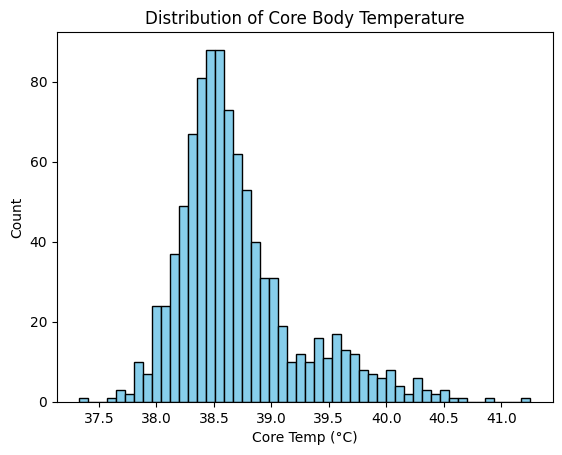

<Axes: title={'center': 'Core_Temp'}, xlabel='Indoor/Outdoor'>

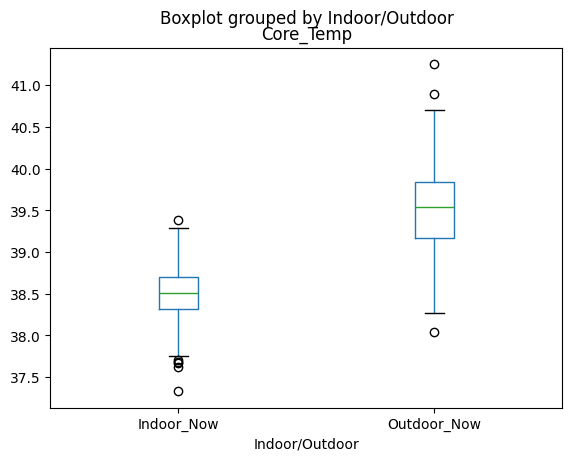

In [114]:
import matplotlib.pyplot as plt

plt.hist(df["Core_Temp"], bins=50, color="skyblue", edgecolor="k")
plt.title("Distribution of Core Body Temperature")
plt.xlabel("Core Temp (°C)")
plt.ylabel("Count")
plt.show()

# Check subgroups
df.boxplot(column="Core_Temp", by="Indoor/Outdoor", grid=False)


In [ ]:
df["Indoor/Outdoor"].value_counts()

Indoor/Outdoor
Indoor_Now     767
Outdoor_Now    191
Name: count, dtype: int64

#### New Features
- ***Station Temp***: raw temp baseline reported by weather station
- ***Station Humidity***: raw humidity baseline reported by weather station
- ***Ambient Temp***: temp experienced in air near dog 
- ***Ambient Humidity***: humidity experienced in air near dog
- ***Temp_Diff***: effect of coat, activity level, environ on temp readings
- ***Hum_Diff***: effect of coat, activity level, environ on humidity readings
- ***T_device***: temp recorded by device
- ***H_device***: humidity recorded by device
- ***CBT***: true core body temp of dog


### ***TODO*** Model Activity level using playfulness & energy level (for breed - already in row), and age for simulated dog (older = less active) 

### Methodology (after initial merges/data engineering from Kaggle):

### 1. Input Features
- **Weather_Temp_station**, **Weather_Hum_station** (from geolocated weather data)
- **Season** (Winter, Spring, Summer, Fall)
- **Indoor flag** (whether the dog primarily occupies indoor or outdoor environments)
- **Coat_Length**, **Coat_Type** (mapped from breed)
- **Energy_Level** (1–5)
- **Playfulness_Level** (1–5)
- **In_Sun flag** (indicator for direct solar exposure)
- *(No wet-fur flag is modeled in this version.)*

---

### 2. Compute `Ambient_Temp_True`
Represents the **true air temperature** around the dog (from weather data + indoor adjustment).

- **If outdoor:**
  \[
  Ambient\_Temp\_True \sim \mathcal{N}(Weather\_Temp\_station, \sigma_{season})
  \]
  Seasonal SDs:
  - Winter = 4 °C  
  - Spring = 4 °C  
  - Summer = 3 °C  
  - Fall = 4 °C

- **If indoor:**
  \[
  Ambient\_Temp\_True \sim \mathcal{N}(22 + 0.2 \times (Weather\_Temp\_station - 22), 2)
  \]
  Uses a 22 °C baseline with weak coupling to outdoor temperature.

---

### 3. Compute `Ambient_Humidity_True`
Represents the **true environmental humidity** (weather-station humidity adjusted for indoor/outdoor).

- **If outdoor:**
  \[
  Ambient\_Humidity\_True \sim \mathcal{N}(Weather\_Hum\_station, 10)
  \]

- **If indoor:**
  \[
  Ambient\_Humidity\_True \sim \mathcal{N}(45 + 0.2 \times (Weather\_Hum\_station - 45), 10)
  \]
  Uses 45 % RH indoor baseline.

---

### 4. Coat-Based Microclimate (“Heat-Trap”) Offsets
Each dog’s coat forms a **microclimate** that traps heat and moisture near the collar.

| Coat Length | Temp Offset (°C) | Humidity Offset (%) |
|--------------|------------------|---------------------|
| Hairless     | +0.2             | +0                  |
| Short        | +0.5             | +2                  |
| Medium       | +1.0             | +4                  |
| Long         | +1.5             | +6                  |
| Arctic       | +2.0             | +8                  |

Small random noise and interactions with extreme ambient heat/humidity can be added.

---

### 5. Collar Device Readings
A sensor **hanging from the dog’s collar** measures the microenvironment **within or just under the fur layer**, not open air.

\[
T_{device} = Ambient\_Temp\_True + temp\_trap + energy\_adj + sun\_adj + \epsilon
\]
\[
H_{device} = Ambient\_Humidity\_True + hum\_trap + energy\_adj\_h + sun\_adj\_h + \epsilon_h
\]

#### Adjustments:
- **Energy / Playfulness factor:**
  \[
  energy\_adj = 0.1 \times (Energy + Playfulness - 6)
  \]
  → higher activity (combined score > 6) slightly increases heat/humidity.

- **Sun exposure:**
  \[
  sun\_adj = 1.5 \text{ °C if In\_Sun = True, else 0}
  \]
  \[
  sun\_adj\_h = 3\% \text{ RH if In\_Sun = True, else 0}
  \]

---

### 6. Simulated Core Body Temperature (CBT)
Estimate CBT as a function of collar temperature and coat insulation.

| Coat Length | Δ (Device → Core) °C |
|--------------|----------------------|
| Hairless     | 0.3 |
| Short        | 0.6 |
| Medium       | 1.0 |
| Long         | 1.6 |
| Arctic       | 2.0 |

\[
CBT = T_{device} + \Delta_{dev\_to\_core} + 0.05 \times (Energy + Playfulness - 6) + \epsilon
\]

Clip CBT to the physiologic range:
\[
37.0 \le CBT \le 40.5
\]

---

### 7. Outputs and Derived Features
Each simulated row will include:

| Variable | Description | Units |
|-----------|--------------|-------|
| `Ambient_Temp_True` | Local air temp (weather + indoor adjustment) | °C |
| `Ambient_Humidity_True` | Local humidity | % |
| `T_device` | Collar sensor temperature | °C |
| `H_device` | Collar sensor humidity | % |
| `CBT` | Core body temperature | °C |
| `Temp_Diff` | T_device − Ambient_Temp_True | °C |
| `Hum_Diff` | H_device − Ambient_Humidity_True | % |
| `Coat_Insulation_Index` | numeric index summarizing coat heat/humidity trap | — |

---

💡 *This version uses energy/playfulness levels instead of direct activity level, treating them as behavioral intensity factors that modestly increase heat and humidity near the sensor.*
